# Validación escenario de Encuesta
# Inteligencia Artificial

## Predicción de datos de encuesta de entretenimiento y ocio


Preparar el Archivo CSV

Utilizar las librerías necesarias para solucionar el problema en Python como son las librerías Pandas, Scikit-learn y  Matplotlib, inicialmente.


Código para el Ejercicio


### Lectura y procesaamiento de Encuesta

In [ ]:
import pandas as pd

df = pd.read_csv('EncuestaIA2.csv', sep=';', quoting=1, encoding='ISO-8859-1');

# Renombrar las columnas (Encuestoa)
df.rename(columns={
    'Id': 'ID',
    'Hora de inicio': 'HoraInicio',
    'Hora de finalización': 'HoraFin',
    'Correo electrónico': 'Email',
    'Nombre': 'Nombre',
    'Pregunta 1: Edad\n': 'Edad',
    'Pregunta 2: Género': 'Genero',
    'Pregunta 3: ¿Cuál es tu género de película favorito?': 'GeneroPeliculaFavorito',
    'Pregunta 4: ¿Qué plataformas de streaming utilizas más?': 'PlataformasStreaming',
    'Pregunta 5: ¿Con qué frecuencia asistes al cine?': 'FrecuenciaCine',
    'Pregunta 6: ¿Qué tipo de actividades de ocio prefieres?': 'ActividadesOcio',
    'Pregunta 7: ¿Cuántas horas a la semana dedicas a tus pasatiempos?': 'HorasPasatiempos',
    'Pregunta 8: ¿Participas en actividades culturales?': 'ActividadesCulturales',
    'Pregunta 9: ¿Qué redes sociales utilizas más?': 'RedesSociales',
    'Pregunta 10: ¿Con qué frecuencia consumes contenido relacionado con entretenimiento en redes sociales?': 'FrecuenciaContenidoSocial',
    'Pregunta 11: ¿Cómo afecta la tecnología a tu forma de disfrutar del ocio?': 'EfectoTecnologiaOcio',
    'Pregunta 12: ¿Estarías dispuesto a probar nuevas tecnologías en entretenimiento?': 'DisposicionTecnologias',
    'Pregunta 13: ¿Qué mejorarías en la oferta de entretenimiento actual?': 'MejorasEntretenimiento',
    'Pregunta 14: ¿Qué nuevos tipos de entretenimiento te gustaría ver en el futuro?': 'NuevosTiposEntretenimiento'
}, inplace=True)

print(df)
print(df.columns)
print("Cambio")
#print(df["GeneroPeliculaFavorito"])
df2 = df.copy()

    ID        HoraInicio           HoraFin      Email  Nombre  \
0   22  4/12/25 17:48:54  4/12/25 17:50:53  anonymous     NaN   
1   23  4/12/25 17:49:55  4/12/25 17:51:51  anonymous     NaN   
2   24  4/12/25 17:49:15  4/12/25 17:52:00  anonymous     NaN   
3   25  4/12/25 17:48:56  4/12/25 17:53:35  anonymous     NaN   
4   26  4/12/25 17:51:51  4/12/25 17:53:45  anonymous     NaN   
5   27  4/12/25 17:51:36  4/12/25 17:54:32  anonymous     NaN   
6   28  4/12/25 17:48:27  4/12/25 17:54:36  anonymous     NaN   
7   29  4/12/25 17:52:32  4/12/25 17:54:58  anonymous     NaN   
8   30  4/12/25 17:51:33  4/12/25 17:55:07  anonymous     NaN   
9   31  4/12/25 17:49:44  4/12/25 17:55:08  anonymous     NaN   
10  32  4/12/25 17:52:32  4/12/25 17:55:32  anonymous     NaN   
11  33  4/12/25 17:54:51  4/12/25 17:56:02  anonymous     NaN   
12  34  4/12/25 17:52:26  4/12/25 17:56:31  anonymous     NaN   
13  35  4/12/25 17:50:25  4/12/25 17:56:44  anonymous     NaN   
14  36  4/12/25 17:52:26 

0     Amazon Prime
1          YouTube
2          YouTube
3          Netflix
4          Netflix
5          YouTube
6          YouTube
7          Netflix
8          YouTube
9          Ninguna
10         YouTube
11            Hulu
12         YouTube
13         YouTube
14         Netflix
15         YouTube
16         Netflix
17         YouTube
18         Netflix
19         YouTube
20         YouTube
Name: PlataformasStreaming, dtype: object


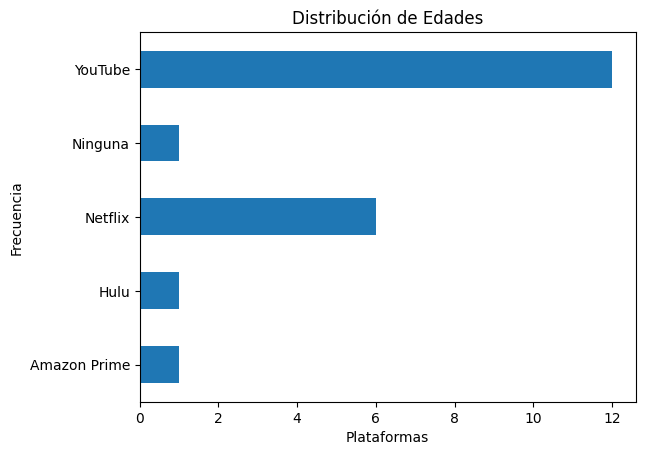

In [ ]:
import matplotlib.pyplot as plt

print(df["PlataformasStreaming"])

df["PlataformasStreaming"].value_counts().sort_index().plot(kind="barh")
plt.title("Distribución de Edades")
plt.xlabel("Plataformas")
plt.ylabel("Frecuencia")
plt.show()

### Campos de múltiple valor

In [ ]:
print(df['ActividadesOcio'].str.split(";").explode().value_counts())

ActividadesOcio
Deportes                     8
Videojuegos                  8
Actividades al aire libre    3
Lectura                      2
Name: count, dtype: int64


# Predecir la plataforma streaming favorita de un estudiante basado en su edad y género

In [ ]:
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
label_encoder = LabelEncoder()

print("PlataformasStreaming")

print(df['PlataformasStreaming'])

print("PlataformasStreaming CODIFICADO")

# Aplicar Label Encoding a las variables categóricas
df['Genero'] = label_encoder.fit_transform(df['Genero'])

df['PlataformasStreaming'] = label_encoder.fit_transform(df['PlataformasStreaming'])
print("PlataformasStreaming codificado")
print(df['PlataformasStreaming'])
df['Edad'] = label_encoder.fit_transform(df['Edad'])

print("X")
X = df[['Genero', 'Edad']]
print(X)
y = df["PlataformasStreaming"]
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

PlataformasStreaming
0          Disney+
1          Netflix
2          YouTube
3          YouTube
4     Amazon Prime
5          Netflix
6          YouTube
7          YouTube
8          Netflix
9          Netflix
10         YouTube
11         Netflix
12         Ninguna
13    Amazon Prime
14         Netflix
15         Netflix
16         YouTube
17    Amazon Prime
18         Netflix
19         YouTube
20         YouTube
Name: PlataformasStreaming, dtype: object
PlataformasStreaming CODIFICADO
PlataformasStreaming codificado
0     1
1     2
2     4
3     4
4     0
5     2
6     4
7     4
8     2
9     2
10    4
11    2
12    3
13    0
14    2
15    2
16    4
17    0
18    2
19    4
20    4
Name: PlataformasStreaming, dtype: int64
X
    Genero  Edad
0        0     2
1        1     1
2        1     1
3        1     1
4        1     1
5        1     0
6        1     1
7        1     1
8        1     0
9        1     1
10       1     2
11       1     1
12       0     0
13       1     0
14      

Arbol de Decisión

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Crear y entrenar el modelo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión: {accuracy}')
print('Reporte de clasificación:')
print(report)

# Gráfico de Importancia de Características
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.tight_layout()
plt.show()

# Visualización del Árbol de Decisión}

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=label_encoder.classes_, filled=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Seleccionar las columnas relevantes para el clustering
X = df[['Genero', 'Edad']]
y = df["PlataformasStreaming"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



# Hacer predicciones y evaluar
y_pred = model.predict(X_test)

# Obtener la importancia de las características
importances = model.feature_importances_
features = X.columns

# Crear un gráfico de barras
indices = np.argsort(importances)[::-1]  # Ordenar las características por importancia

plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.tight_layout()
plt.show()

## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

# Dividir el conjunto de datos en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificar la distribución de clases después de la división
print("Distribución de clases en y_train:")
print(y_train.value_counts())
print("\nDistribución de clases en y_test:")
print(y_test.value_counts())

# Crear y entrenar el modelo SVM
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = model.predict(X_test)

# Identificar grupos de estudiantes basados en sus preferencias de entretenimiento

In [ ]:
df["HorasPasatiempos"] = df["HorasPasatiempos"].astype("category").cat.codes;
print(df["HorasPasatiempos"])

X = pd.get_dummies(df[['Edad', 'HorasPasatiempos']], drop_first=True)
print(X)

0     2
1     2
2     3
3     2
4     2
5     1
6     1
7     0
8     1
9     2
10    1
11    1
12    2
13    1
14    3
15    2
16    2
17    1
18    1
19    2
20    2
Name: HorasPasatiempos, dtype: int8
    Edad  HorasPasatiempos
0      2                 2
1      1                 2
2      1                 3
3      1                 2
4      1                 2
5      0                 1
6      1                 1
7      1                 0
8      0                 1
9      1                 2
10     2                 1
11     1                 1
12     0                 2
13     0                 1
14     2                 3
15     2                 2
16     2                 2
17     2                 1
18     1                 1
19     1                 2
20     1                 2


## Clustering con K-means

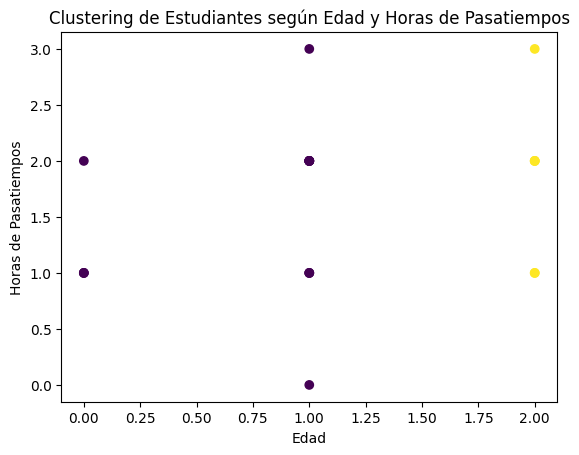

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)  # Puedes ajustar el número de clusters
df['Cluster'] = kmeans.fit_predict(X)

# Visualización de los clusters
plt.scatter(df['Edad'], df['HorasPasatiempos'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Horas de Pasatiempos')
plt.title('Clustering de Estudiantes según Edad y Horas de Pasatiempos')
plt.show()

## Análisis de Agrupamiento Jerárquico

    Edad  Genero  GeneroPeliculaFavorito  PlataformasStreaming  \
0      2       0                       1                     1   
1      1       1                       5                     2   
2      1       1                       7                     4   
3      1       1                      10                     4   
4      1       1                      17                     0   
5      0       1                      10                     2   
6      1       1                      14                     4   
7      1       1                      12                     4   
8      0       1                       4                     2   
9      1       1                       0                     2   
10     2       1                       3                     4   
11     1       1                       2                     2   
12     0       0                      13                     3   
13     0       1                      16                     0   
14     2  

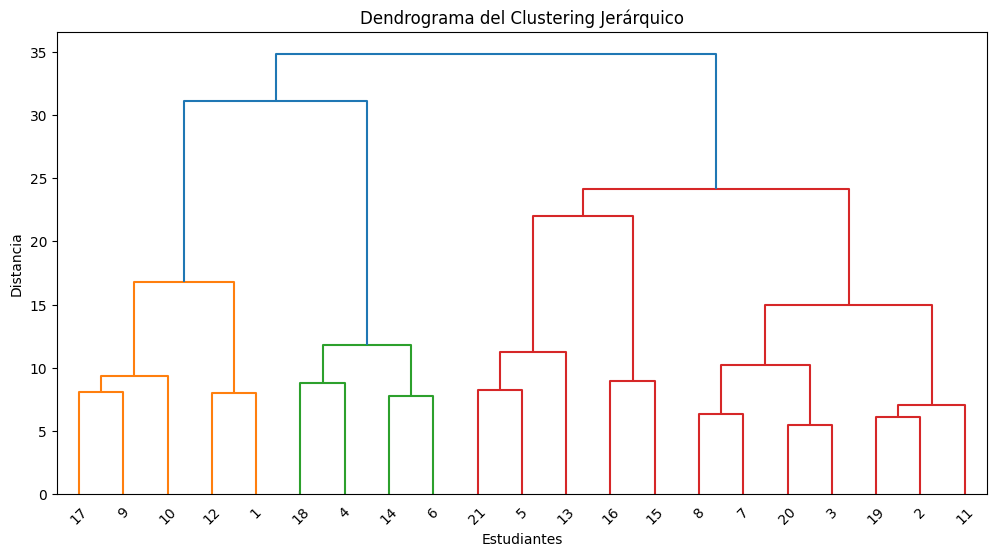

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar las variables categóricas
label_encoders = {}
categorical_columns = ['Edad', 'Genero', 'GeneroPeliculaFavorito', 'PlataformasStreaming',
                       'FrecuenciaCine', 'ActividadesOcio', 'HorasPasatiempos',
                       'ActividadesCulturales', 'RedesSociales', 'FrecuenciaContenidoSocial',
                       'EfectoTecnologiaOcio', 'DisposicionTecnologias',
                       'MejorasEntretenimiento', 'NuevosTiposEntretenimiento']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Visualizar el DataFrame codificado
print(df[categorical_columns])

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Seleccionar las columnas codificadas para clustering
X = df[categorical_columns].values

# Realizar el clustering jerárquico
linked = linkage(X, method='ward')

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=df['ID'].astype(str).values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Estudiantes')
plt.ylabel('Distancia')
plt.show()

| **Pregunta**                                                                                     | **Tipo de Análisis**                           | **Tipo de Aprendizaje**    | **Características**                                    | **Clases a Usar**                       |
|--------------------------------------------------------------------------------------------------|------------------------------------------------|-----------------------------|------------------------------------------------------|-----------------------------------------|
| 1. Edad                                                                                          | Segmentación por edad                          | No supervisado              | Edad (numérico)                                     | K-means, DBSCAN                         |
| 2. Género                                                                                        | Análisis de grupos por género                  | No supervisado              | Género (categórico)                                 | K-means, Agrupamiento jerárquico       |
| 3. ¿Cuál es tu género de película favorito?                                                    | Análisis de preferencias                       | No supervisado              | Género de película (categórico)                     | K-means, Agrupamiento jerárquico       |
| 4. ¿Qué plataformas de streaming utilizas más?                                                 | Análisis de preferencias                       | No supervisado              | Plataformas de streaming (categórico)               | K-means, Agrupamiento jerárquico       |
| 5. ¿Con qué frecuencia asistes al cine?                                                        | Análisis de hábitos                            | No supervisado              | Frecuencia (categórico)                             | K-means, DBSCAN                         |
| 6. ¿Qué tipo de actividades de ocio prefieres?                                                 | Análisis de preferencias                       | No supervisado              | Actividades de ocio (categórico)                    | K-means, Agrupamiento jerárquico       |
| 7. ¿Cuántas horas a la semana dedicas a tus pasatiempos?                                      | Análisis de tiempo dedicado                    | No supervisado              | Horas en pasatiempos (numérico)                     | K-means, DBSCAN                         |
| 8. ¿Participas en actividades culturales?                                                       | Análisis de participación                      | No supervisado              | Participación (categórico)                           | K-means, Agrupamiento jerárquico       |
| 9. ¿Qué redes sociales utilizas más?                                                            | Análisis de redes sociales                     | No supervisado              | Redes sociales (categórico)                          | K-means, Agrupamiento jerárquico       |
| 10. ¿Con qué frecuencia consumes contenido relacionado con entretenimiento en redes sociales?  | Análisis de hábitos en redes sociales          | No supervisado              | Frecuencia (categórico)                             | K-means, DBSCAN                         |
| 11. ¿Cómo afecta la tecnología a tu forma de disfrutar del ocio?                               | Análisis de impacto de tecnología              | No supervisado              | Efecto de tecnología (categórico)                    | Análisis de sentimiento, K-means, DBSCAN |
| 12. ¿Estarías dispuesto a probar nuevas tecnologías en entretenimiento?                        | Análisis de disposición                        | No supervisado              | Disposición (categórico)                            | K-means, Agrupamiento jerárquico       |
| 13. ¿Qué mejorarías en la oferta de entretenimiento actual?                                     | Análisis de mejoras propuestas                 | No supervisado              | Mejoras (texto)                                    | Análisis de texto, K-means              |
| 14. ¿Qué nuevos tipos de entretenimiento te gustaría ver en el futuro?                         | Análisis de preferencias futuras               | No supervisado              | Nuevos tipos de entretenimiento (texto)             | Análisis de texto, K-means              |

#Clustering de usuarios por preferencias

Cluster
1    9
0    8
2    4
Name: count, dtype: int64
Silhouette Score: 0.29012650521749517


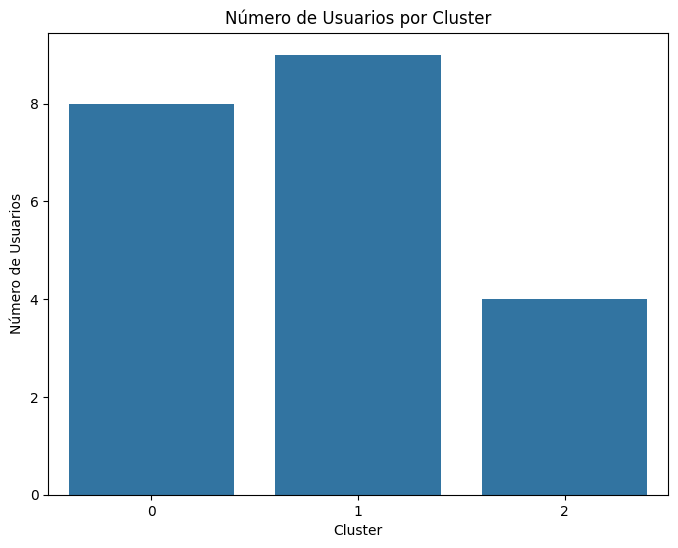

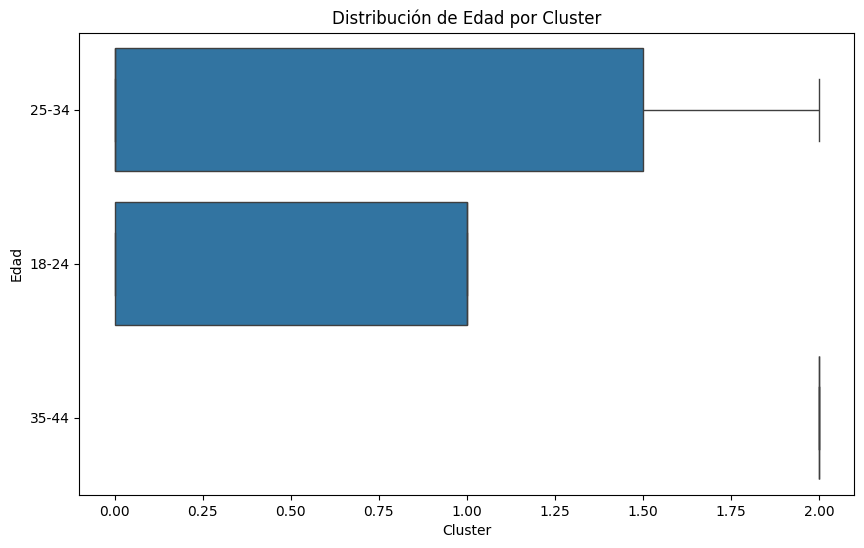

TypeError: no numeric data to plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Preprocesamiento
# Seleccionar las columnas relevantes para el clustering
X = df[['Edad', 'Genero', 'GeneroPeliculaFavorito', 'PlataformasStreaming']]
X = X.apply(LabelEncoder().fit_transform)  # Codificar todas las columnas

# Escalar los datos (importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Definir el número de clusters
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analizar los clusters
print(df['Cluster'].value_counts())

# Calcular el coeficiente de silueta para evaluar la calidad del clustering
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualizaciones

# 1. Conteo de puntos por cluster (Gráfico de barras)
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Número de Usuarios por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Usuarios')
plt.show()

# 2. Distribución de Edad por Cluster (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Edad', data=df)
plt.title('Distribución de Edad por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Edad')
plt.show()

# 3. Distribución de Género por Cluster (Gráfico de barras apilado)
# Primero, convertir 'Genero' de nuevo a su forma original (si es necesario) para la interpretación
df['Genero_Original'] = df['Genero'].map({0: 'Masculino', 1: 'Femenino', 2: 'Otro'})  # Ajusta el mapeo según tus datos

cluster_genero_counts = df.groupby(['Cluster', 'Genero_Original']).size().unstack(fill_value=0)
cluster_genero_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Género por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario
plt.legend(title='Género')
plt.show()


# 4.  Plataformas de Streaming Favoritas por Cluster (Gráfico de barras)
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='PlataformasStreaming', data=df)
plt.title('Plataformas de Streaming por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Usuarios')
plt.show()

# 5.  Género de Película Favorito por Cluster
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='GeneroPeliculaFavorito', data=df)
plt.title('Género de Película Favorito por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Número de Usuarios')
plt.show()

 # Predicción de la disposición a usar nuevas tecnologías

Accuracy: 0.8


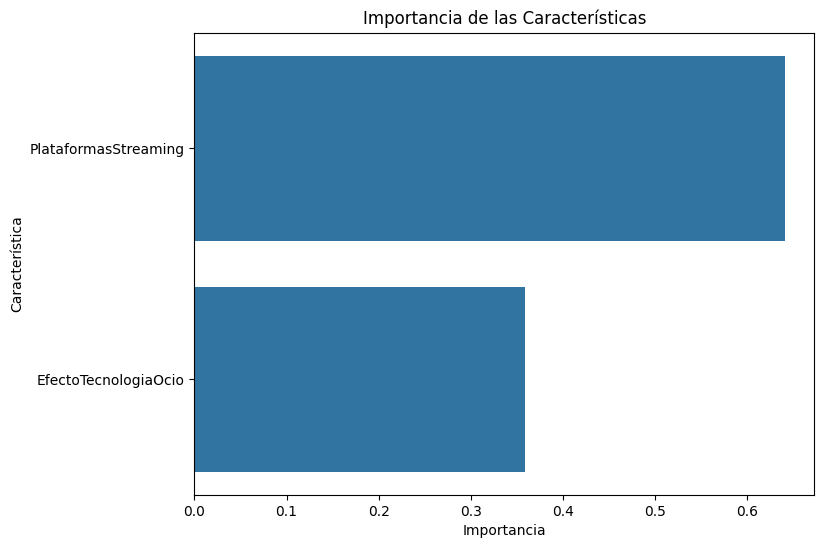

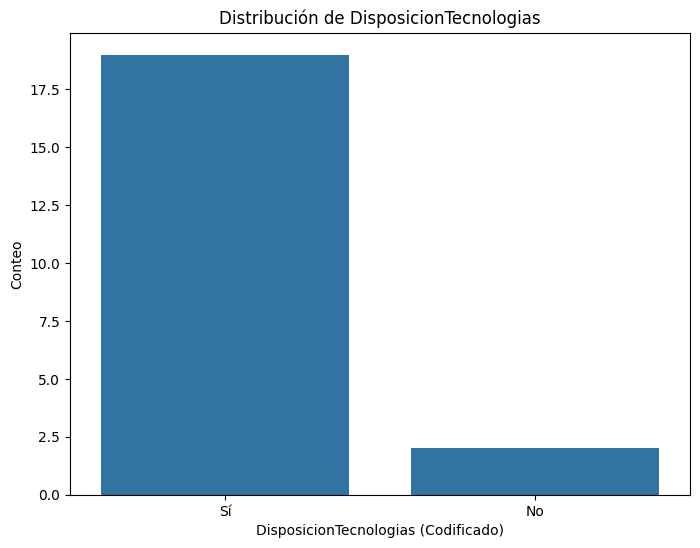

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocesamiento

df['PlataformasStreaming'] = LabelEncoder().fit_transform(df['PlataformasStreaming'])
df['EfectoTecnologiaOcio'] = LabelEncoder().fit_transform(df['EfectoTecnologiaOcio'])

# Seleccionar características y variable objetivo
X = df[['PlataformasStreaming', 'EfectoTecnologiaOcio']]
y = df['DisposicionTecnologias']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Importancia de las características (Feature Importance)
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


# Conteo de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='DisposicionTecnologias', data=df)
plt.title('Distribución de DisposicionTecnologias')
plt.xlabel('DisposicionTecnologias (Codificado)')
plt.ylabel('Conteo')
plt.show()